<a href="https://colab.research.google.com/github/DavoodSZ1993/Dive_into_Deep_Learning/blob/main/10_3___DeepRNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l==1.0.0-alpha1.post0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 KB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.5 MB/s eta 0:00:00


## 10.3 Deep Recurrent Neural Networks

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

### 10.3.1 Implementation from Scratch

In [6]:
class StackRNNScratch(d2l.Module):
  def __init__(self, num_inputs, num_hiddens, num_layers, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.rnns = nn.Sequential(*[d2l.RNNScratch(
        num_inputs if i==0 else num_hiddens, num_hiddens, sigma)
    for i in range(num_layers)])

In [7]:
@d2l.add_to_class(StackRNNScratch)
def forward(self, inputs, Hs=None):
  outputs = inputs
  if Hs is None: Hs = [None] * self.num_layers
  for i in range(self.num_layers):
    outputs, Hs[i] = self.rnns[i](outputs, Hs[i])
    outputs = torch.stack(outputs, 0)
  return outputs, Hs

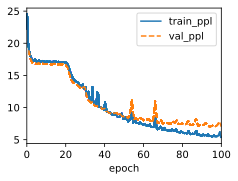

In [8]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn_block = StackRNNScratch(num_inputs=len(data.vocab), num_hiddens=32, num_layers=2)
model = d2l.RNNLMScratch(rnn_block, vocab_size=len(data.vocab), lr=2)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)